### Case 1 - Mengolah Data FuelConsumptionCo2 Menggunakan Linear Regression

In [ ]:
#import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
%matplotlib inline

In [ ]:
#data
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


A. Persamaan Regresi Linear antara 'ENGINESIZE' dan 'CO2EMISSIONS'

<function matplotlib.pyplot.show>

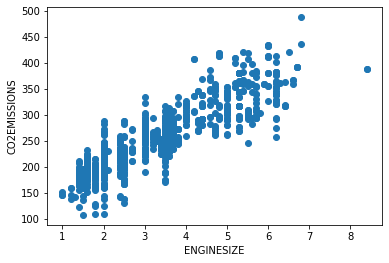

In [ ]:
#plotting data 'ENGINESIZE' dan 'CO2EMISSIONS'
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show

In [ ]:
#Regresi Linear

regresi = lm.LinearRegression()

#set semua data masing-masing variabel jadi data train
train_x = df[['ENGINESIZE']]
train_y = df[['CO2EMISSIONS']]

#Lakukan Regresi Linear terhadap data Train
regresi.fit (train_x, train_y)

#Menampilkan nilai A dan B
print ('Koefisien a : ', regresi.coef_)
print ('Intersep b : ',regresi.intercept_)

Koefisien a :  [[39.12519979]]
Intersep b :  [125.3040995]


B. Prediksi Nilai 'CO2EMISSIONS'

In [ ]:
# Cara 1
print("Jika ENGINESIZE = 3.5, maka CO2EMISSIONS = ",regresi.predict([[3.5]]))

Jika ENGINESIZE = 3.5, maka CO2EMISSIONS =  [[262.24229875]]


In [ ]:
# Cara 2
co2em_predict = regresi.predict([[3.5]])
co2em = co2em_predict[0][0]
print("Jika ENGINESIZE = 3.5, maka CO2EMISSIONS = ",co2em)

Jika ENGINESIZE = 3.5, maka CO2EMISSIONS =  262.24229874884793


C. Plot Regresi Linear

Text(0, 0.5, 'CO2EMISSIONS')

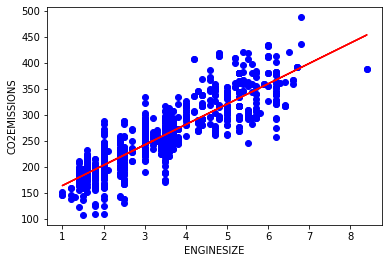

In [ ]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regresi.coef_[0][0]*train_x + regresi.intercept_[0], '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

D. Hitung Koefisien Determinasi untuk mencari hubungan antara 'ENGINESIZE' dan 'CO2EMISSIONS'

In [ ]:
koef_determinasi = regresi.score(train_x,train_y)
print("Koef. Determinasi : ",koef_determinasi)

Koef. Determinasi :  0.7641458597854816


=========================================================================================================================

In [ ]:
#pakai variabel lain di data
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [ ]:
#Jika butuh membagi data train dan test (cth= 80 : 20 -> train : test) secara random
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

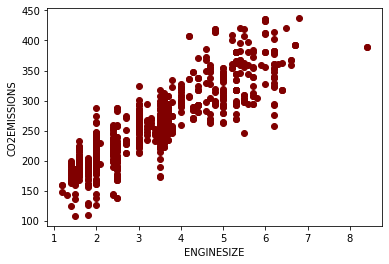

In [ ]:
#menampilkan plot data train
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='maroon')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

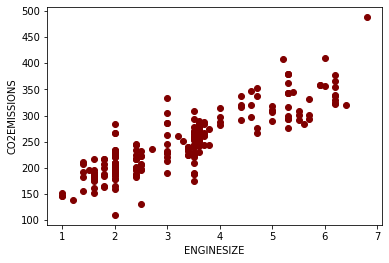

In [ ]:
#menampilkan plot data test
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='maroon')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

### Case 2 - Contoh data yang tidak cocok di linear regression

In [ ]:
#dict
d_data = {'Level':[1,2,3,4,5,6,7,8,9,10],
         'Gaji':[45000,50000,60000,80000,110000,150000,200000,300000,500000,1000000]}

#df
data = pd.DataFrame(d_data)

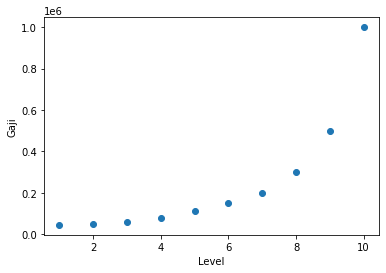

In [ ]:
#plotting
plt.scatter(data.Level, data.Gaji)
plt.xlabel("Level")
plt.ylabel("Gaji")
plt.show()

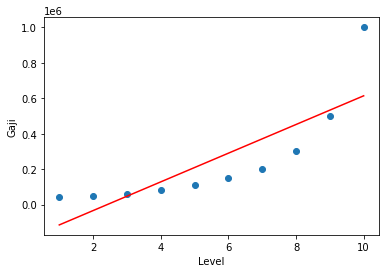

Skor dengan Reg. Linear 0.6690412331929895


In [ ]:
#Pengujian Menggunakan Regresi Linear
reg_lin = lm.LinearRegression()
reg_lin.fit(data[['Level']], data[['Gaji']])
score_det = reg_lin.score(data[['Level']], data[['Gaji']])

plt.scatter(data.Level, data.Gaji)
plt.plot(data.Level, reg_lin.predict(data[['Level']]), color='red')
plt.xlabel("Level")
plt.ylabel("Gaji")
plt.show()

print("Skor dengan Reg. Linear", score_det)

- Error tinggi<br>
- Underfitting<br>
- Data berbentuk kurva